# Space Mission from 1957 Data Analysis

## What will you learn from this project?
* Bivariate Analysis
* Sunburst and World Map Charts
* Comparison of Features
* Exploratory Data Analysis (EDA)

## Analysis Content
1. [Python Libraries](#1)
1. [Data Content](#2)
1. [Read and Analyze Data](#3)
1. [Number of Launches by Every Company](#4)
1. [Rocket Status](#5)
1. [Mission Status](#6)
1. [Rocket Cost Distribution with Rocket Status](#7)
1. [Rocket Cost Distribution with Mission Status](#8)
1. [Total Spent Money for each Companies](#9)
1. [Mission Numbers by Year](#10)
1. [Countries and Mission Status](#11)
1. [Sunburst Chart Analysis](#12)
1. [Status Mission by Countries in World Map](#13)
1. [Conclusion](#14)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from iso3166 import countries

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

## Data Content
* **Company Name:** Company
* **Location:** Location of the Launch
* **Datum:** Datum and Time of Launch
* **Detail:** Rocket Name
* **Status Rocket:** Status of the rocket
* **Rocket:** Cost of the mission: in $ million
* **Status Mission:** Status of the mission

## 1) Read and Analyze Data

In [2]:
df = pd.read_csv("data/Space_Corrected.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company Name    4324 non-null   object
 1   Location        4324 non-null   object
 2   Datum           4324 non-null   object
 3   Detail          4324 non-null   object
 4   Status Rocket   4324 non-null   object
 5    Rocket         964 non-null    object
 6   Status Mission  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [4]:
df.describe() # herbiri string olduğu için numeric değerlere özel ayrıntılar yok.

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


## 2) Visualize Data
### Number of Launches by Every Company

In [6]:
df["Company Name"].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [19]:
ds = df["Company Name"].value_counts().rename_axis('Company').rename("Frequency").reset_index()[:28] # reset_index, geçici index sütunu ekler 
ds

,Company,Frequency
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


### BAR Plot

In [21]:
fig = go.Figure(go.Bar(x = ds["Company"],
                       y = ds["Frequency"],
                       marker = dict( color = ds["Frequency"], colorscale = "bluered")))
fig.update_layout(title = "Number of Launches by Every Company", xaxis_title = "Top 28 Country", yaxis_title = "Frequency", hovermode = "x")
fig.show()

### B) Rocket Status

In [22]:
ds = df["Status Rocket"].value_counts().rename_axis('Status Rocket').rename("Frequency").reset_index()  # reset_index, geçici index sütunu ekler 
ds

,Status Rocket,Frequency
0,StatusRetired,3534
1,StatusActive,790


In [23]:
fig = px.pie(ds, values = "Frequency", names = "Status Rocket", title = "Rocket Status")
fig.show()

### C) Mission Status

In [26]:
ds = df["Status Mission"].value_counts().rename_axis('Status Mission').rename("Frequency").reset_index()[:3]  # reset_index, geçici index sütunu ekler 
ds

,Status Mission,Frequency
0,Success,3879
1,Failure,339
2,Partial Failure,102


In [27]:
fig = px.bar(ds, x = "Status Mission", y = "Frequency", title = "Mission Status")
fig.show()

### D) Rocket Cost Distribution with Rocket Status

In [30]:
np.sum(pd.isna(df.loc[:," Rocket"]))

3360

In [31]:
df_ = df.dropna(subset=[" Rocket"], axis = "rows")
len(df_)

964

In [32]:
np.sum(pd.isna(df_.loc[:," Rocket"]))

0

In [33]:
df_.loc[:, " Rocket"]

0        50.0 
1       29.75 
3        65.0 
4       145.0 
5       64.68 
         ...  
3855     59.0 
3971    63.23 
3993    63.23 
4000    63.23 
4020    63.23 
Name:  Rocket, Length: 964, dtype: object

In [34]:
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].fillna(0.0).str.replace(",","")
df_.loc[:, " Rocket"] = df_.loc[:, " Rocket"].astype(np.float64).fillna(0.0)

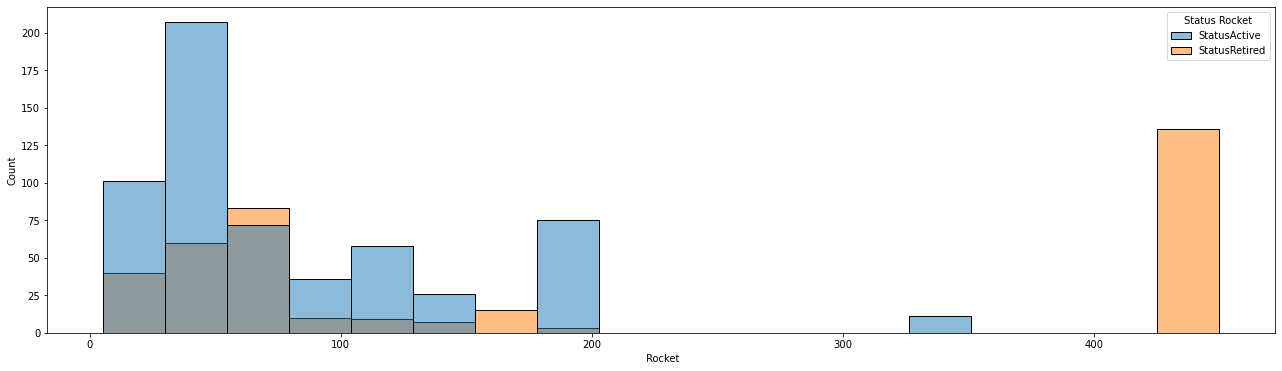

In [35]:
df_d = df_[df_.loc[:, " Rocket"]<1000]
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Rocket")
plt.show()

## E) Rocket Cost Distribution with Mission Status 

In [37]:
np.sum(pd.isna(df.loc[:,"Status Mission"]))

0

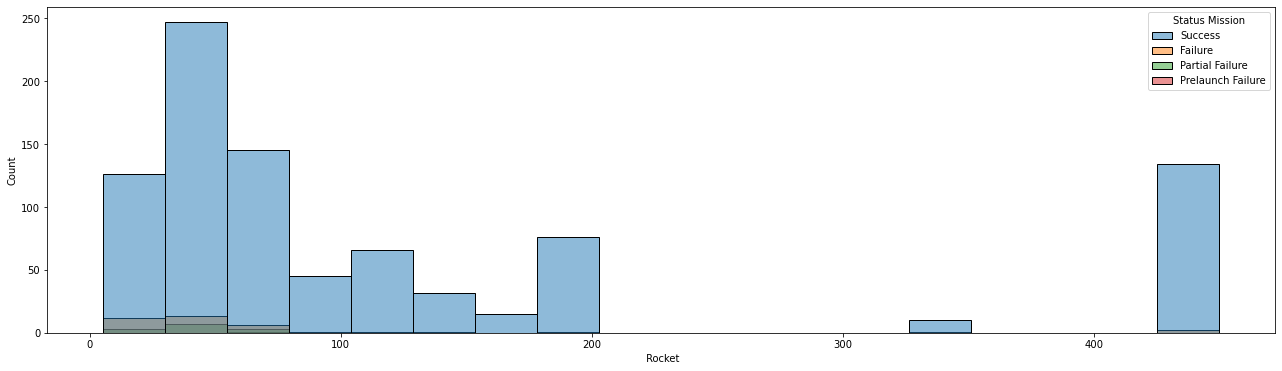

In [38]:
plt.figure(figsize = (22,6))
sns.histplot(data = df_d, x = " Rocket", hue = "Status Mission")
plt.show()

### F) Total Spent Money for each Companies

In [39]:
df_.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [40]:
df_money = df_.groupby(["Company Name"])[" Rocket"].sum().reset_index()
df_money = df_money[df_money[" Rocket"] > 0] # maliyeti 0'dan büyük olanlar için
df_money.head()

,Company Name,Rocket
0,Arianespace,16345.00
1,Boeing,1241.00
2,CASC,6340.26
3,EER,20.00
4,ESA,37.00


In [41]:
df_money_ = df_money.sort_values(by = [" Rocket"], ascending = False)[:15] # ilk 15 tanesini alırız.
df_money_.head()

,Company Name,Rocket
14,NASA,76280.00
0,Arianespace,16345.00
21,ULA,14798.00
16,RVSN USSR,10000.00
2,CASC,6340.26


In [42]:
fig = px.bar(df_money_, x = "Company Name", y = " Rocket", title = "Total Spent Money for each Company")
fig.show()

### G) Mission Numbers by Year

In [43]:
df["date"] = pd.to_datetime(df["Datum"]) #convert from object to datetime
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [51]:
df["year"] = df["date"].apply(lambda datetime: datetime.year) # get year of datetime and set all data in datetime column
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020


In [52]:
ds = df["year"].value_counts().rename_axis('Year').rename("Frequency").reset_index() # reset_index, geçici index sütunu ekler 
ds

,Year,Frequency
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


In [54]:
fig = px.bar(ds, x = "Year", y = "Frequency", title = "Missions Number by Year")
fig.show()

### H) Countries and Mission Status

In [58]:
df["Status Mission"] # 4 farklı etiket var => 3=Success, 0=Failure, 1=Partial Failerue, 2=Prelaunch Failure

0       Success
1       Success
2       Success
3       Success
4       Success
         ...   
4319    Failure
4320    Success
4321    Failure
4322    Success
4323    Success
Name: Status Mission, Length: 4324, dtype: object

In [59]:
encoder = LabelEncoder()
encoder.fit(df["Status Mission"])
encoder

LabelEncoder()

In [60]:
colors = {0: "red", 
          1 : "Orange", 
          2 : "Yellow", 
          3 : "Green"}
colors

{0: 'red', 1: 'Orange', 2: 'Yellow', 3: 'Green'}

In [62]:
countries_dict = { # ülke isimleri değiştirilir.
    'Russia' : 'Russian Federation',
    'New Mexico' : 'USA',
    "Yellow Sea": 'China',
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": 'USA',
    "Barents Sea": 'Russian Federation',
    "Gran Canaria": 'USA'
}
df["country"] = df["Location"].str.split(", ").str[-1].replace(countries_dict) # locationdan country'yi alıp bir column olarak oluşturulur.
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA


In [63]:
fig = make_subplots(rows = 4, cols = 4, subplot_titles = df["country"].unique())
for i, country in enumerate(df["country"].unique()):
    counts = df[df["country"] == country]["Status Mission"].value_counts(normalize = True)*100 # normalization
    color = [colors[x] for x in encoder.transform(counts.index)]
    trace = go.Bar(x = counts.index, y = counts.values, name = country, marker = {"color" : color}, showlegend = False)
    fig.add_trace(trace, row = (i//4) + 1, col = (i%4)+1)
fig.update_layout(title = {"text":"Countries and Mission Status"}, height = 1000, width = 1100)
for i in range(1,5):
    fig.update_yaxes(title_text = "Percentage", row = i, col = 1)
fig.show()

### I) Sunburst Chart Analysis

In [64]:
sun = df.groupby(["country","Company Name","Status Mission"])["Datum"].count().reset_index() # datum=2 => 2 farklı tarih
sun.head()

,country,Company Name,Status Mission,Datum
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1


In [65]:
sun = sun[(sun.country == "USA") | (sun.country == "China") | (sun.country == "Russian Federation") | (sun.country == "France")] # Başarılı ülkeler
sun.head()

,country,Company Name,Status Mission,Datum
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231
10,China,CASIC,Failure,2
11,China,CASIC,Success,3


In [66]:
fig = px.sunburst(sun, path = ["country", "Company Name", "Status Mission"], values = "Datum", title = "Sunburst Chart for some Countries")
fig.show()

### J) Status Mission by Countries in World Map

In [71]:
for c in countries:
    print(c.alpha3) # short country name

AFG
ALA
ALB
DZA
ASM
AND
AGO
AIA
ATA
ATG
ARG
ARM
ABW
AUS
AUT
AZE
BHS
BHR
BGD
BRB
BLR
BEL
BLZ
BEN
BMU
BTN
BOL
BES
BIH
BWA
BVT
BRA
IOT
BRN
BGR
BFA
BDI
KHM
CMR
CAN
CPV
CYM
CAF
TCD
CHL
CHN
CXR
CCK
COL
COM
COG
COD
COK
CRI
CIV
HRV
CUB
CUW
CYP
CZE
DNK
DJI
DMA
DOM
ECU
EGY
SLV
GNQ
ERI
EST
ETH
FLK
FRO
FJI
FIN
FRA
GUF
PYF
ATF
GAB
GMB
GEO
DEU
GHA
GIB
GRC
GRL
GRD
GLP
GUM
GTM
GGY
GIN
GNB
GUY
HTI
HMD
VAT
HND
HKG
HUN
ISL
IND
IDN
IRN
IRQ
IRL
IMN
ISR
ITA
JAM
JPN
JEY
JOR
KAZ
KEN
KIR
PRK
KOR
XKX
KWT
KGZ
LAO
LVA
LBN
LSO
LBR
LBY
LIE
LTU
LUX
MAC
MKD
MDG
MWI
MYS
MDV
MLI
MLT
MHL
MTQ
MRT
MUS
MYT
MEX
FSM
MDA
MCO
MNG
MNE
MSR
MAR
MOZ
MMR
NAM
NRU
NPL
NLD
NCL
NZL
NIC
NER
NGA
NIU
NFK
MNP
NOR
OMN
PAK
PLW
PSE
PAN
PNG
PRY
PER
PHL
PCN
POL
PRT
PRI
QAT
REU
ROU
RUS
RWA
BLM
SHN
KNA
LCA
MAF
SPM
VCT
WSM
SMR
STP
SAU
SEN
SRB
SYC
SLE
SGP
SXM
SVK
SVN
SLB
SOM
ZAF
SGS
SSD
ESP
LKA
SDN
SUR
SJM
SWZ
SWE
CHE
SYR
TWN
TJK
TZA
THA
TLS
TGO
TKL
TON
TTO
TUN
TUR
TKM
TCA
TUV
UGA
UKR
ARE
GBR
USA
UMI
URY
UZB
VUT
VEN
VNM
VGB
VIR
WLF
ESH
YEM
ZMB
ZWE


In [72]:
country_dict = dict()
for c in countries:
    country_dict[c.name] = c.alpha3
df["alpha3"] = df["country"]
df = df.replace({
    "alpha3":country_dict
})
df.loc[df["country"]== "North Korea","alpha3"] = "PRK" # bu ülkelerin kısaltması olmadığı için manual yapıyoruz.
df.loc[df["country"]== "South Korea","alpha3"] = "KOR"
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,date,year,country,alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,USA,USA


In [73]:
mapdf = df.groupby(["country","alpha3"])["Status Mission"].count().reset_index()
mapdf.head() 

,country,alpha3,Status Mission
0,Australia,AUS,6
1,Brazil,BRA,3
2,China,CHN,269
3,France,FRA,303
4,India,IND,76


In [74]:
fig = px.choropleth(mapdf, locations = "alpha3", hover_name = "country", color = "Status Mission", title ="Status Mission by Countries")
fig.show()